In [15]:
# all the imports necessary for the code to run
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt  
import numpy as np

In [16]:
# extracting data from dataset file
data = pd.read_csv('dataset.csv')
data_array = data.values

In [17]:
# printing the original data in table format
data

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
...,...,...,...,...,...,...,...,...,...,...,...
812,ZA,South Africa,2020-04-01,-42.446,-37.600,34.916,-69.728,-77.371,-72.935,1380,5
813,ZA,South Africa,2020-04-02,-40.523,-38.226,36.550,-69.577,-77.874,-73.331,1462,5
814,ZA,South Africa,2020-04-03,-42.107,-43.271,38.379,-71.513,-77.944,-72.745,1505,9
815,ZA,South Africa,2020-04-04,-51.515,-57.252,26.499,-76.589,-77.026,-55.095,1585,9


In [18]:
# dividing our columns into different arrays to prepare them for the algorithms
grocery = data['grocery_pharmacy'].values
parks = data['parks'].values
residential = data['residential'].values
retail = data['retail_recreation'].values
transit = data['transit_stations'].values
work = data['workplaces'].values
cases = data['total_cases'].values
deaths = data['fatalities'].values

In [19]:
# The next 5 sets of instructions is for pre-processing but is not being used at the moment
labelencoder_X = LabelEncoder()
start_date=datetime.strptime(min(data.iloc[:,2]),"%Y-%m-%d")
independent_data=data.iloc[:,0:1].values
dates=data.iloc[:,2].values
new_dates=[]
dependant_data=data.iloc[:,9:].values

for row in data.iloc[:,2].values: #calculates diff of dates in days
  new_dates.append((datetime.strptime(row,"%Y-%m-%d")-start_date).days)

In [20]:
# independent_data[:,0] = labelencoder_X.fit_transform(independent_data[:,0])
independent_data = OneHotEncoder().fit_transform(independent_data).toarray()
independent_data = np.append(independent_data,np.array(new_dates)[:, None],axis=1) #append dates
independent_data = np.append(independent_data,data.iloc[:,3:9].values,axis=1)
independent_data

array([[  1.   ,   0.   ,   0.   , ...,  13.644,   5.334,  -2.486],
       [  1.   ,   0.   ,   0.   , ...,  -9.973, -26.785, -53.687],
       [  1.   ,   0.   ,   0.   , ..., -19.717, -28.485, -50.053],
       ...,
       [  0.   ,   0.   ,   0.   , ..., -71.513, -77.944, -72.745],
       [  0.   ,   0.   ,   0.   , ..., -76.589, -77.026, -55.095],
       [  0.   ,   0.   ,   0.   , ..., -75.913, -78.001, -44.329]])

In [82]:
#Changing data to cumulative values

new_grocery=[]
new_parks=[]
new_residential=[]
new_retail=[]
new_transit=[]
new_work=[]
new_cases=[]
new_deaths=[]

for i in range(len(grocery)): 
  if (i%43==0):
    new_grocery.append((grocery[i]*0.01+1)*100)
    new_parks.append((parks[i]*0.01+1)*100)
    new_residential.append((residential[i]*0.01+1)*100)
    new_retail.append((retail[i]*0.01+1)*100)
    new_transit.append((transit[i]*0.01+1)*100)
    new_work.append((work[i]*0.01+1)*100)
    new_cases.append(cases[i])
    new_deaths.append(deaths[i])
  else:
    new_grocery.append((grocery[i]*0.01+1)*new_grocery[-1])
    new_parks.append((parks[i]*0.01+1)*new_parks[-1])
    new_residential.append((residential[i]*0.01+1)*new_residential[-1])
    new_retail.append((retail[i]*0.01+1)*new_retail[-1])
    new_transit.append((transit[i]*0.01+1)*new_transit[-1])
    new_work.append((work[i]*0.01+1)*new_work[-1])
    new_cases.append(cases[i]-cases[i-1])
    new_deaths.append(deaths[i]-deaths[i-1])

In [22]:
#transform to array
new_grocery=np.array(new_grocery).reshape(-1,1)
new_parks=np.array(new_parks).reshape(-1,1)
new_residential=np.array(new_residential).reshape(-1,1)
new_retail=np.array(new_retail).reshape(-1,1)
new_transit=np.array(new_transit).reshape(-1,1)
new_work=np.array(new_work).reshape(-1,1)
new_cases=np.array(new_cases).reshape(-1,1)
new_deaths=np.array(new_deaths).reshape(-1,1)

In [84]:
# Split the data into training and testing
X_grocery_train, X_grocery_test = train_test_split(grocery, test_size=0.2, random_state=0)
X_parks_train, X_parks_test = train_test_split(parks, test_size=0.2, random_state=0)
X_residential_train, X_residential_test = train_test_split(residential, test_size=0.2, random_state=0)
X_retail_train, X_retail_test = train_test_split(retail, test_size=0.2, random_state=0)
X_transit_train, X_transit_test = train_test_split(transit, test_size=0.2, random_state=0)
X_work_train, X_work_test = train_test_split(work, test_size=0.2, random_state=0)
y_cases_train, y_cases_test = train_test_split(new_cases, test_size=0.2, random_state=0)
y_deaths_train, y_deaths_test = train_test_split(new_deaths, test_size=0.2, random_state=0)

In [ ]:
#join all activities
training=(X_grocery_train, X_parks_train, X_residential_train,X_retail_train,X_transit_train,X_work_train)
training = np.hstack(training)
test=(X_grocery_test,X_parks_test,X_residential_test,X_retail_test,X_transit_test,X_work_test)
test = np.hstack(test)

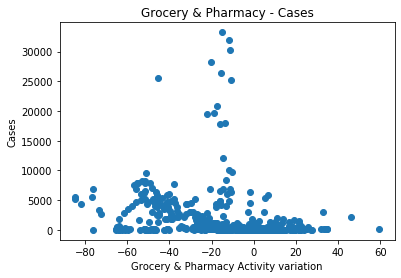

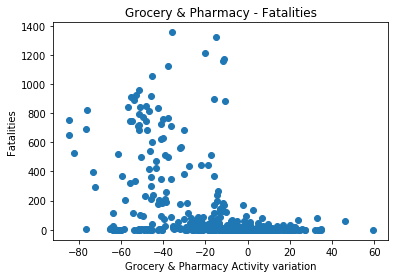

In [92]:
################# Grocery Analysis #####################

# show data regarding pharmacy vs Cases
plt.plot(grocery,new_cases,'o')
plt.title('Grocery & Pharmacy - New Cases')  
plt.xlabel('Grocery & Pharmacy Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(grocery,new_deaths,'o')
plt.title('Grocery & Pharmacy - New Fatalities')  
plt.xlabel('Grocery & Pharmacy Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

In [25]:
### Linear Regression


linear_regressor = LinearRegression()  

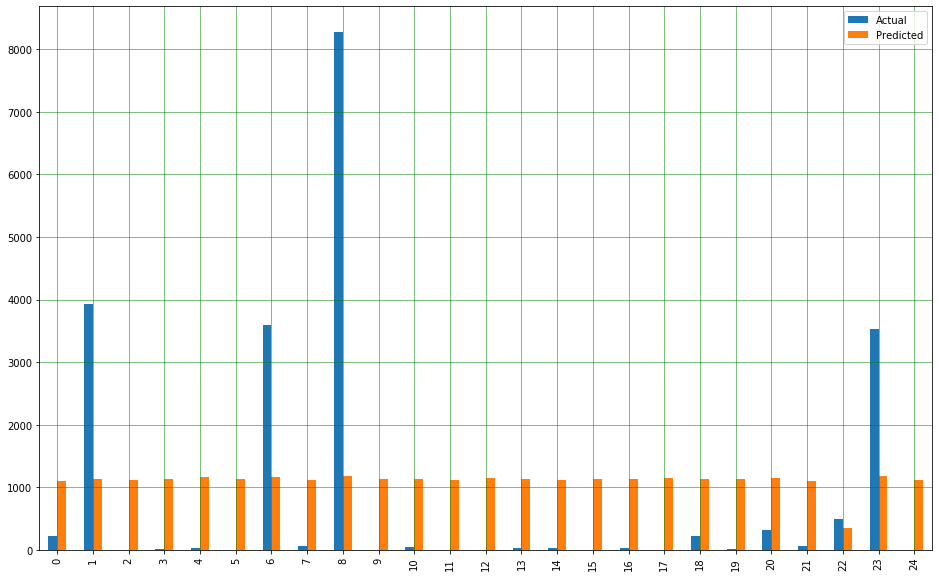

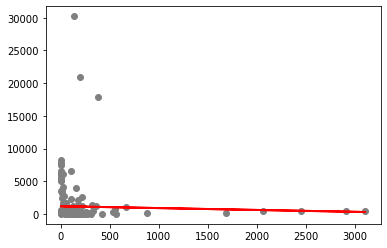

In [26]:
## Grocery vs Cases
linear_regressor.fit(X_grocery_train, y_cases_train) #training the algorithm
grocery_cases_pred = linear_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_grocery_test, y_cases_test,  color='gray')
plt.plot(X_grocery_test, grocery_cases_pred, color='red', linewidth=2)
plt.show()

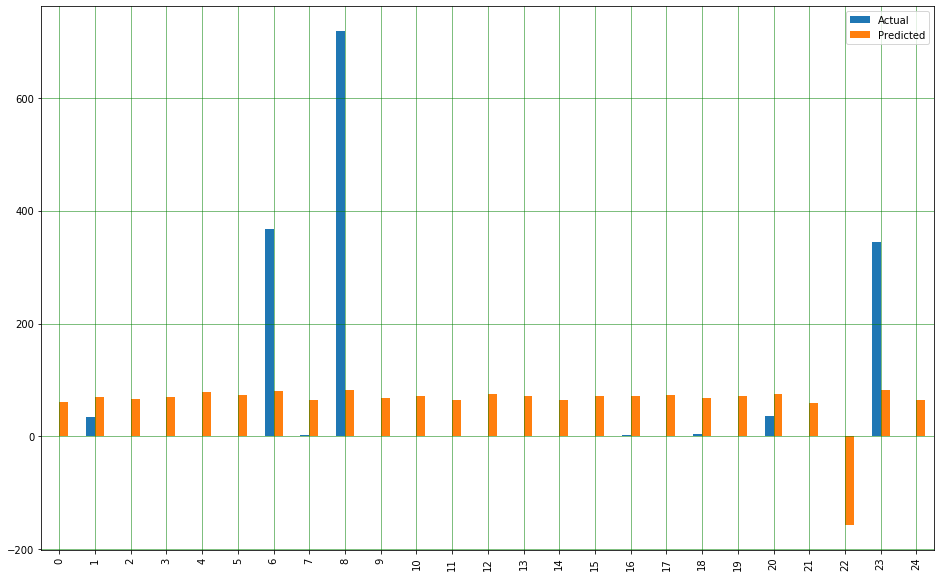

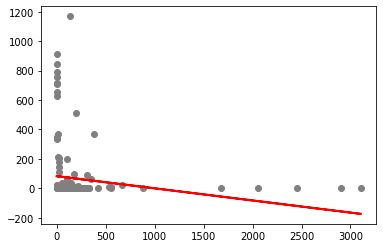

In [27]:
## Grocery vs Deaths
linear_regressor.fit(X_grocery_train, y_deaths_train) #training the algorithm
grocery_deaths_pred = linear_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_grocery_test, y_deaths_test,  color='gray')
plt.plot(X_grocery_test, grocery_deaths_pred, color='red', linewidth=2)
plt.show()

In [28]:
### Decision Tree

# Fit regression model
decision_tree_regressor = DecisionTreeRegressor(max_depth=5)

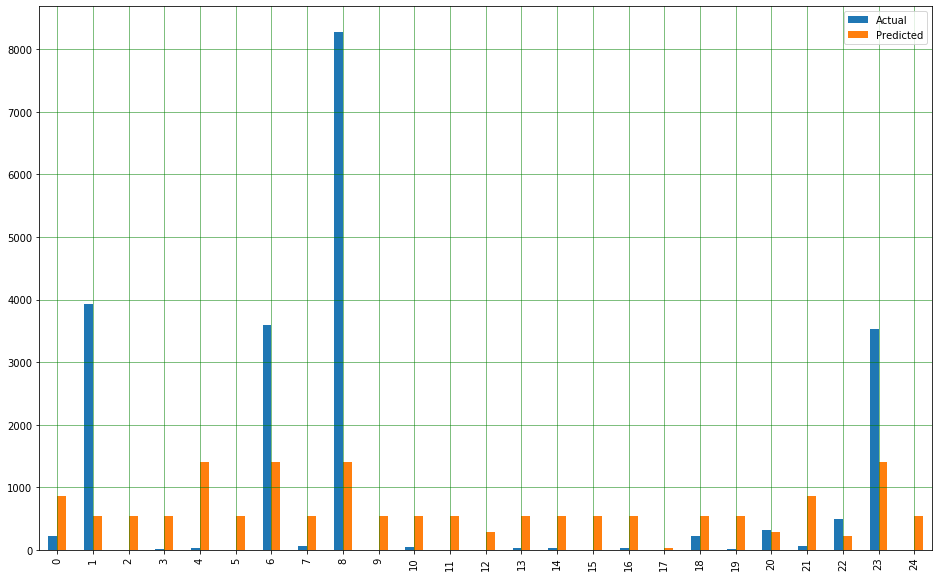

In [29]:
## Grocery vs Cases
decision_tree_regressor.fit(X_grocery_train, y_cases_train)
grocery_cases_pred = decision_tree_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

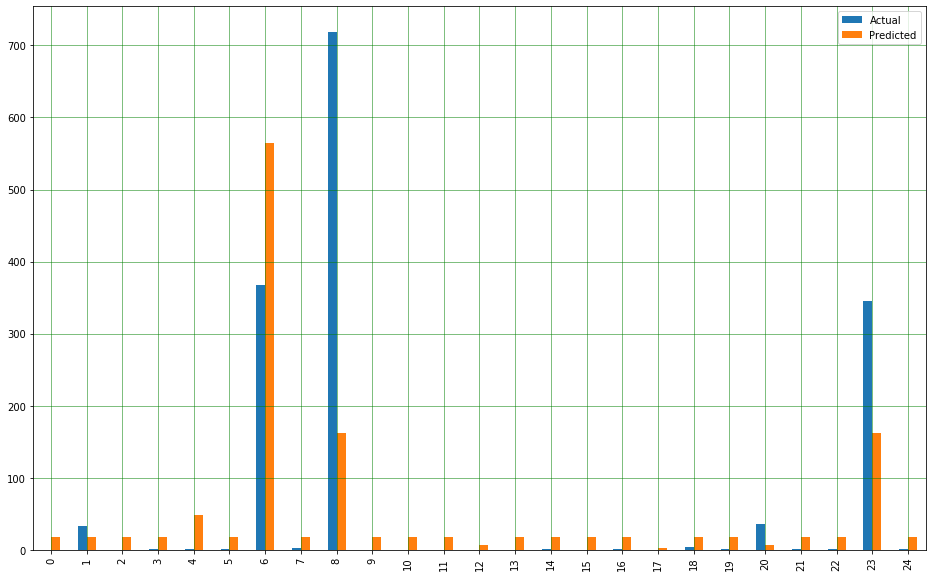

In [30]:
## Grocery vs Deaths
decision_tree_regressor.fit(X_grocery_train, y_deaths_train)
grocery_deaths_pred = decision_tree_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [31]:
### Support Vector Machecins
svm_regressor = svm.SVR()

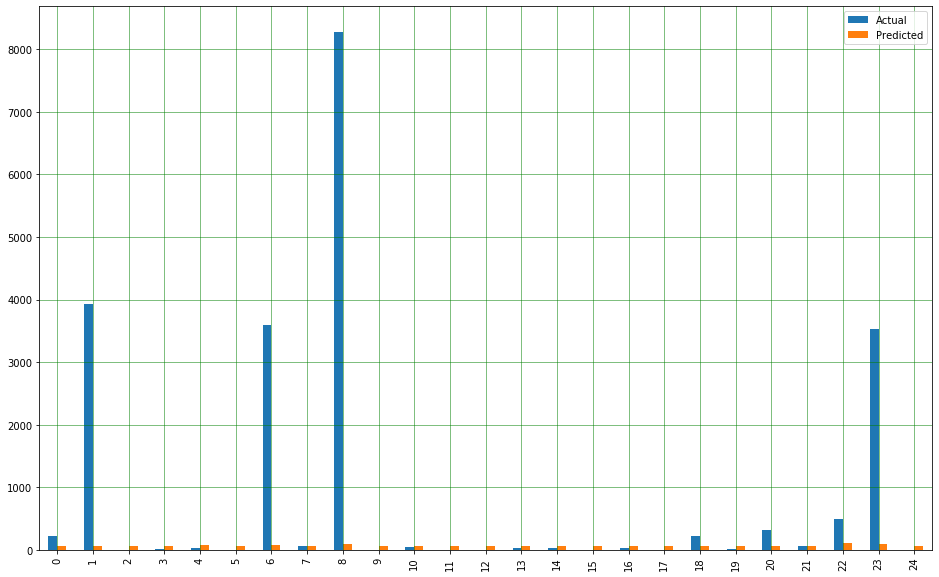

In [32]:
## Grocery vs Cases
svm_regressor.fit(X_grocery_train, y_cases_train.ravel())
grocery_cases_pred = svm_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

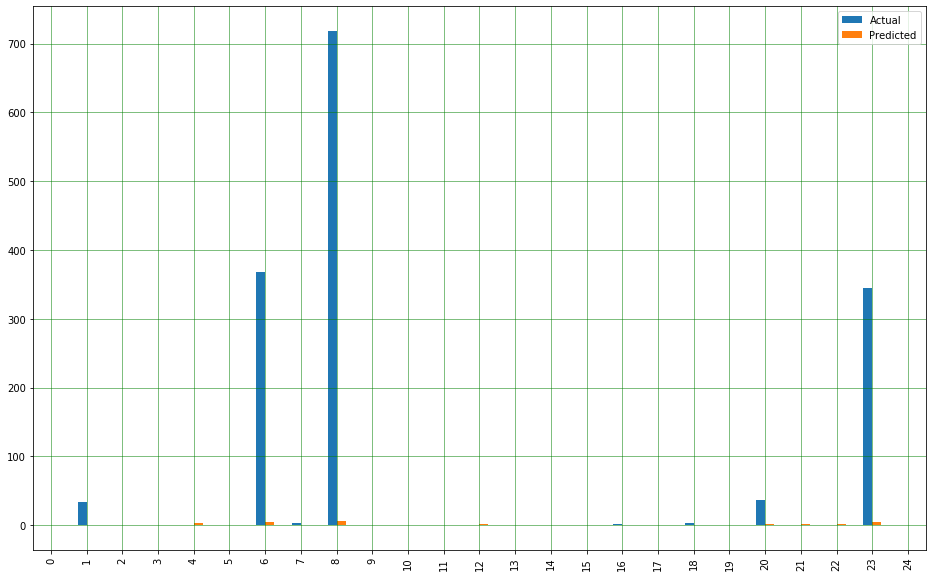

In [33]:
## Grocery vs Deaths
svm_regressor.fit(X_grocery_train, y_deaths_train.ravel())
grocery_deaths_pred = svm_regressor.predict(X_grocery_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

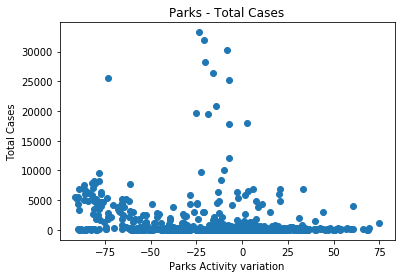

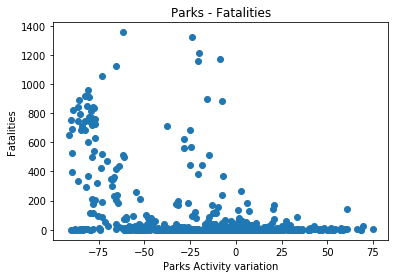

In [88]:
################# Parks Analysis #####################

# show data regarding parks vs Cases
plt.plot(parks,new_cases,'o')
plt.title('Parks - New Cases')  
plt.xlabel('Parks Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(parks,new_deaths,'o')
plt.title('Parks - New Fatalities')  
plt.xlabel('Parks Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

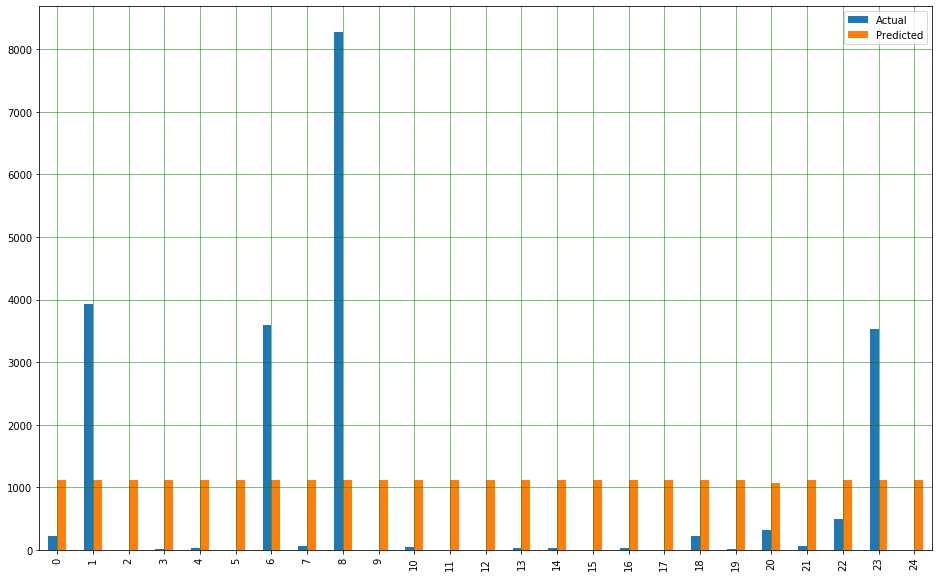

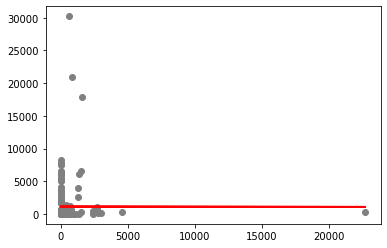

In [35]:
### Linear Regression


linear_regressor_p = LinearRegression()  

## Parks vs Cases
linear_regressor_p.fit(X_parks_train, y_cases_train) #training the algorithm
parks_pred = linear_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': parks_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_parks_test, y_cases_test,  color='gray')
plt.plot(X_parks_test, parks_pred, color='red', linewidth=2)
plt.show()

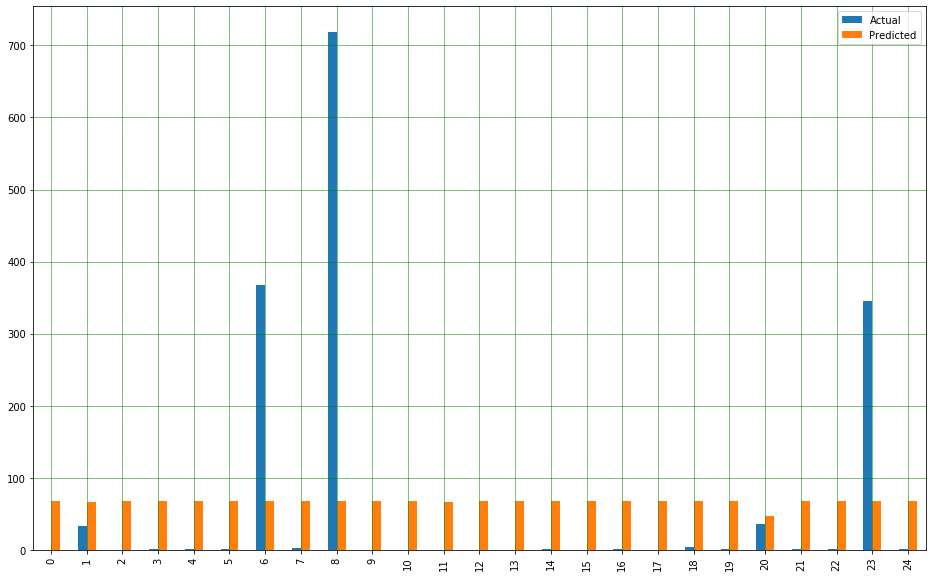

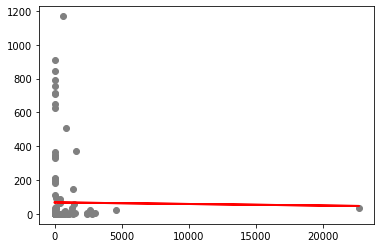

In [36]:
## Parks vs Deaths
linear_regressor_p.fit(X_parks_train, y_deaths_train) #training the algorithm
parks_deaths_pred = linear_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': parks_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.scatter(X_parks_test, y_deaths_test,  color='gray')
plt.plot(X_parks_test, parks_deaths_pred, color='red', linewidth=2)
plt.show()

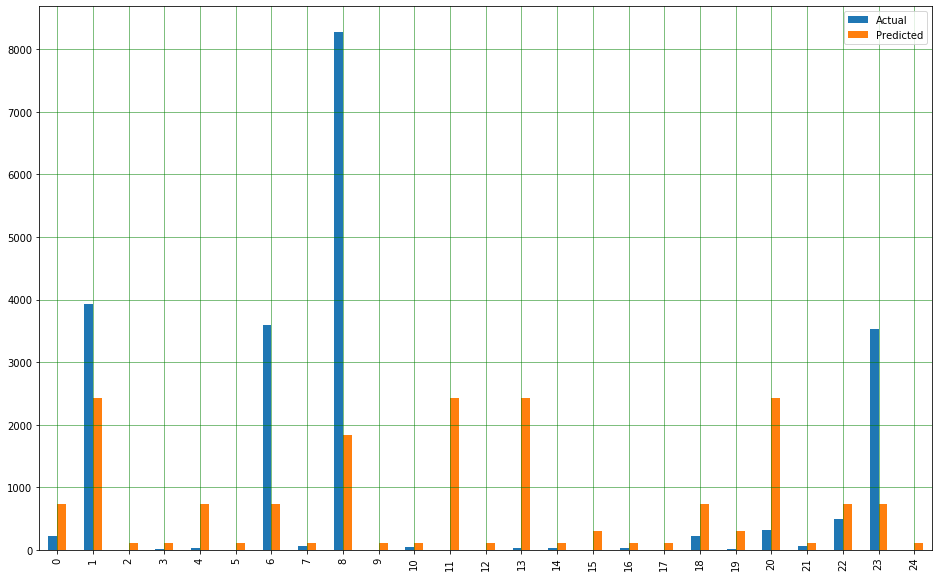

In [37]:
### Decision Tree

# Fit regression model
decision_tree_regressor_p = DecisionTreeRegressor(max_depth=5)

## Parks vs Cases
decision_tree_regressor_p.fit(X_parks_train, y_cases_train)
parks_cases_pred = decision_tree_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': parks_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

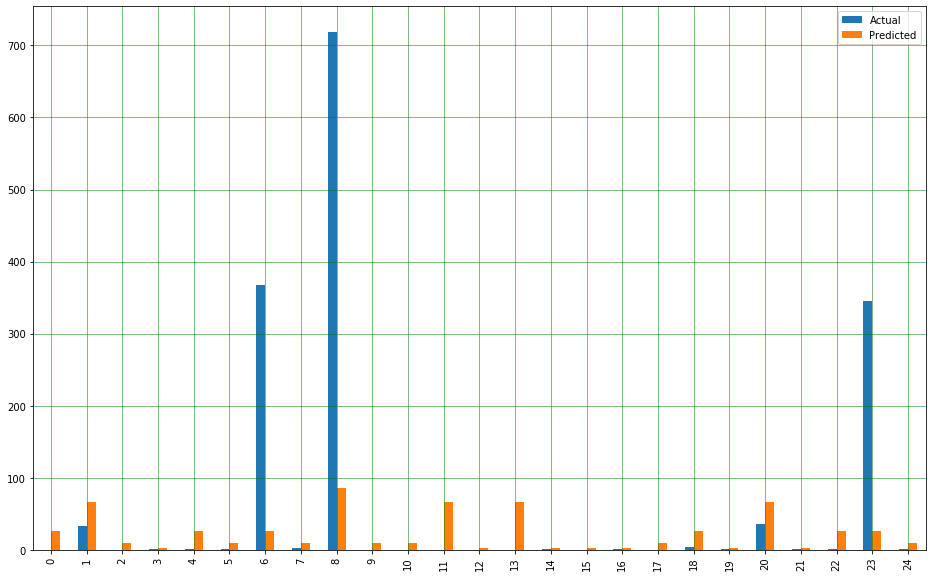

In [38]:
## Parks vs Deaths
decision_tree_regressor_p.fit(X_parks_train, y_deaths_train)
parks_deaths_pred = decision_tree_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': parks_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

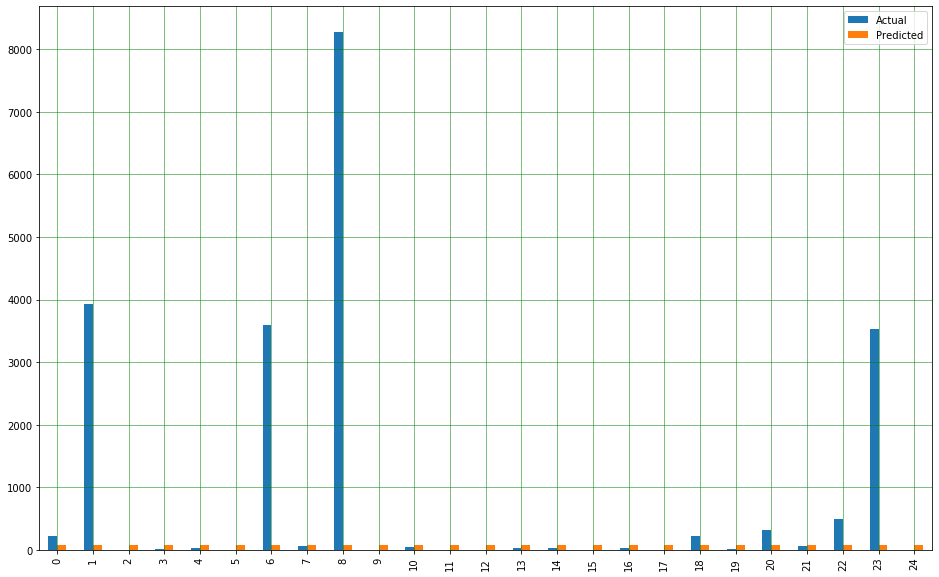

In [39]:
### Support Vector Machines
svm_regressor_p = svm.SVR()

## Parks vs Cases
svm_regressor_p.fit(X_parks_train, y_cases_train.ravel())
parks_cases_pred = svm_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': parks_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

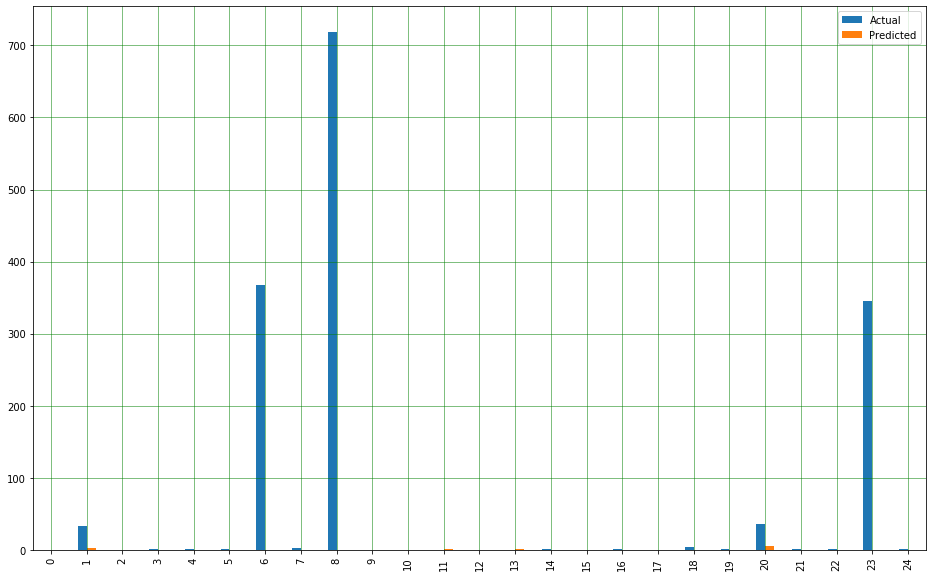

In [40]:
## Parks vs Deaths
svm_regressor_p.fit(X_parks_train, y_deaths_train.ravel())
parks_deaths_pred = svm_regressor_p.predict(X_parks_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': parks_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

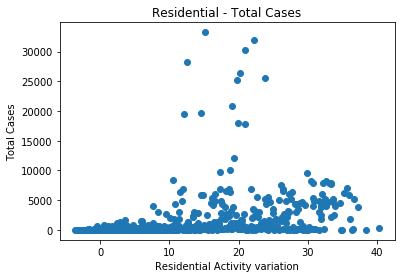

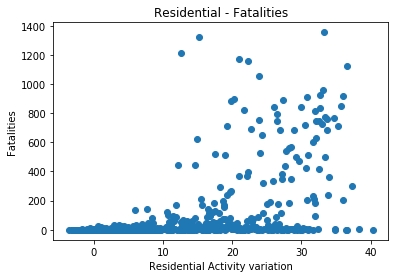

In [89]:
################# Residential Analysis #####################

# show data regarding parks vs Cases
plt.plot(residential,new_cases,'o')
plt.title('Residential - New Cases')  
plt.xlabel('Residential Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(residential,new_deaths,'o')
plt.title('Residential - New Fatalities')  
plt.xlabel('Residential Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

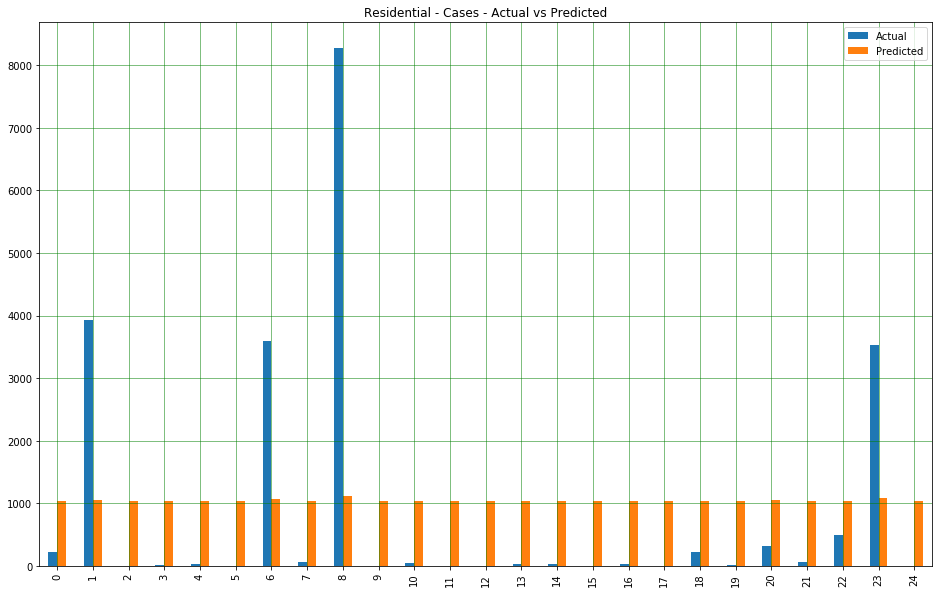

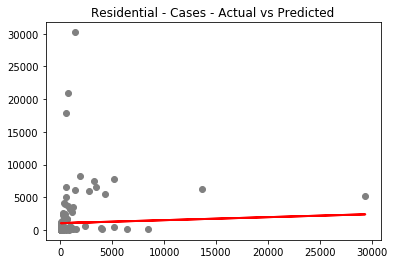

In [42]:
### Linear Regression


linear_regressor_r = LinearRegression()  

## Residential vs Cases
linear_regressor_r.fit(X_residential_train, y_cases_train) #training the algorithm
residential_cases_pred = linear_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': residential_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Cases - Actual vs Predicted')  
plt.scatter(X_residential_test, y_cases_test,  color='gray')
plt.plot(X_residential_test, residential_cases_pred, color='red', linewidth=2)
plt.show()

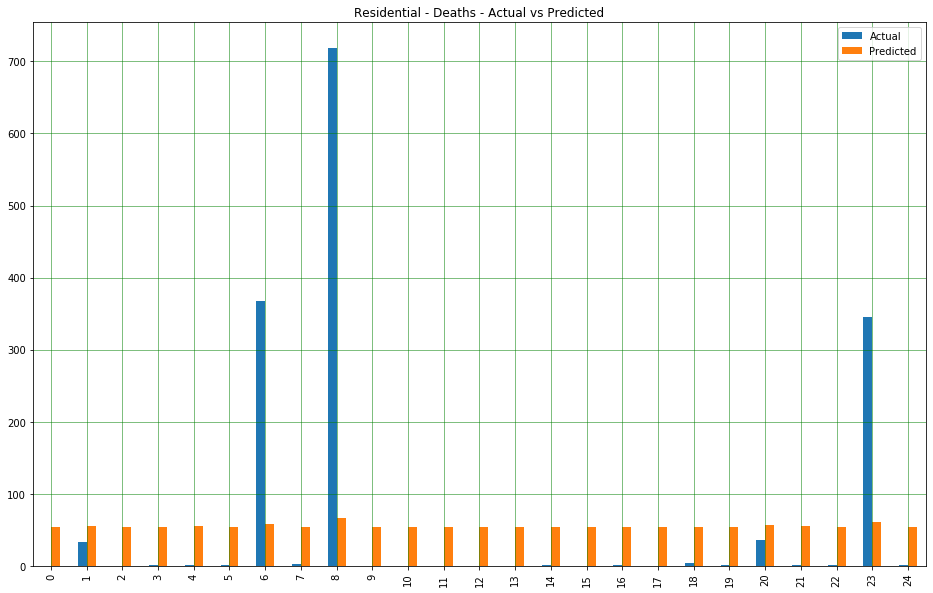

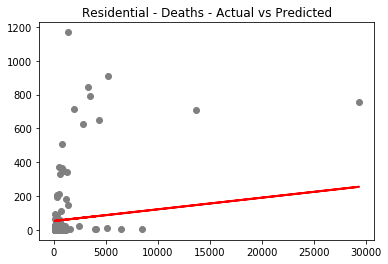

In [43]:
## Residential vs Deaths
linear_regressor_r.fit(X_residential_train, y_deaths_train) #training the algorithm
residential_deaths_pred = linear_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': residential_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.scatter(X_residential_test, y_deaths_test,  color='gray')
plt.plot(X_residential_test, residential_deaths_pred, color='red', linewidth=2)
plt.show()

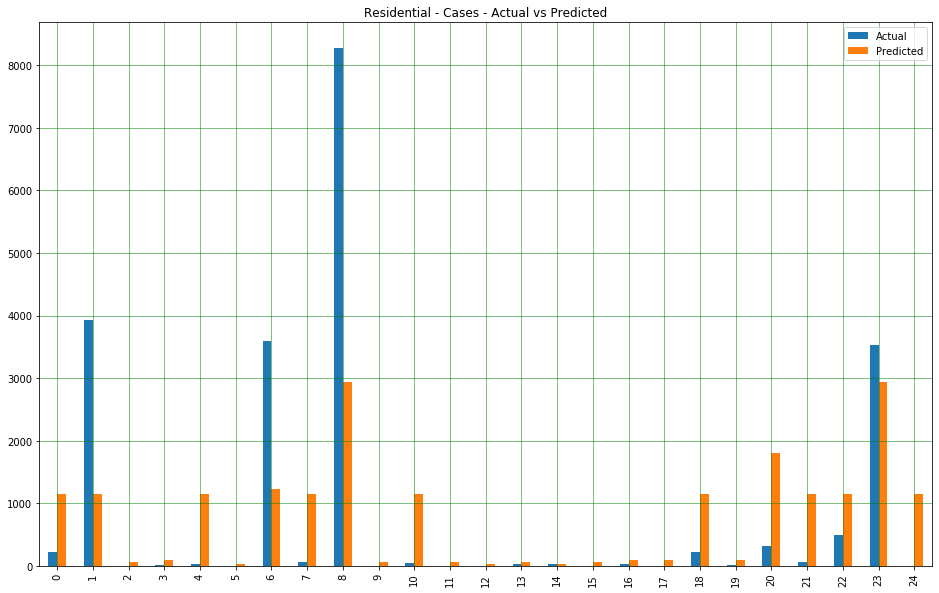

In [44]:
### Decision Tree

# Fit regression model
decision_tree_regressor_r = DecisionTreeRegressor(max_depth=5)

## Residential vs Cases
decision_tree_regressor_r.fit(X_residential_train, y_cases_train)
residential_cases_pred = decision_tree_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': residential_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

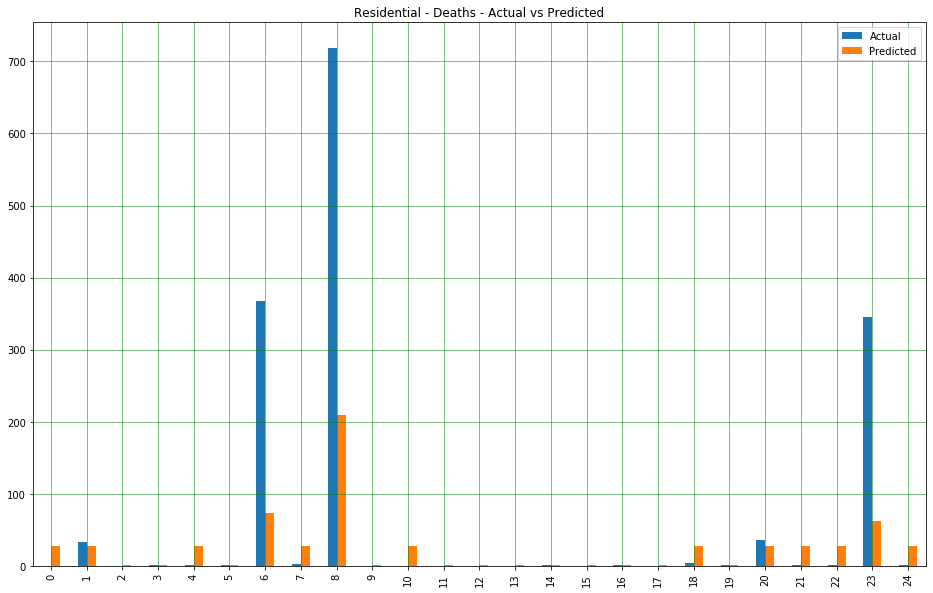

In [45]:
## Residential vs Deaths
decision_tree_regressor_r.fit(X_residential_train, y_deaths_train)
residential_deaths_pred = decision_tree_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': residential_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

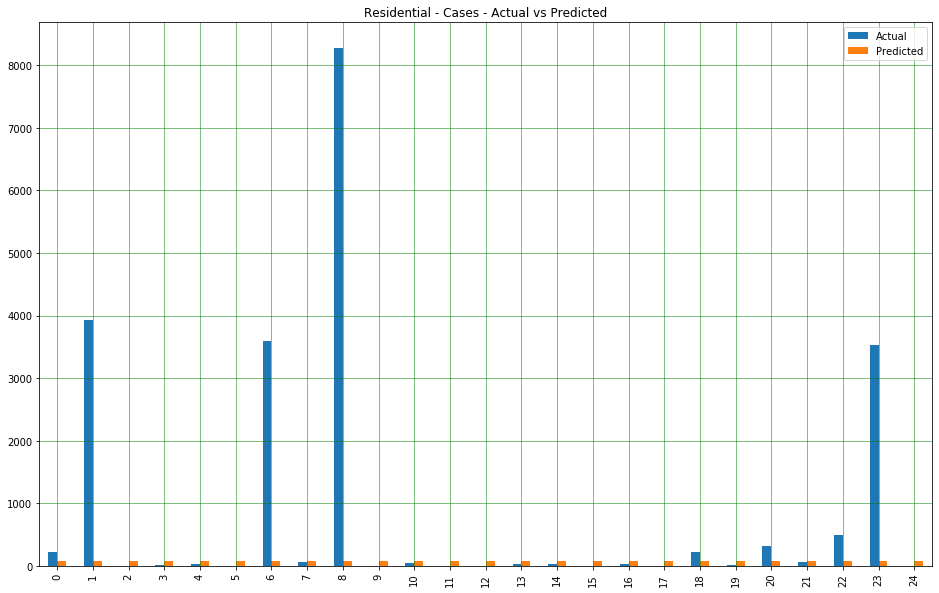

In [46]:
### Support Vector Machines
svm_regressor_r = svm.SVR()

## Residential vs Cases
svm_regressor_r.fit(X_residential_train, y_cases_train.ravel())
residential_cases_pred = svm_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': residential_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

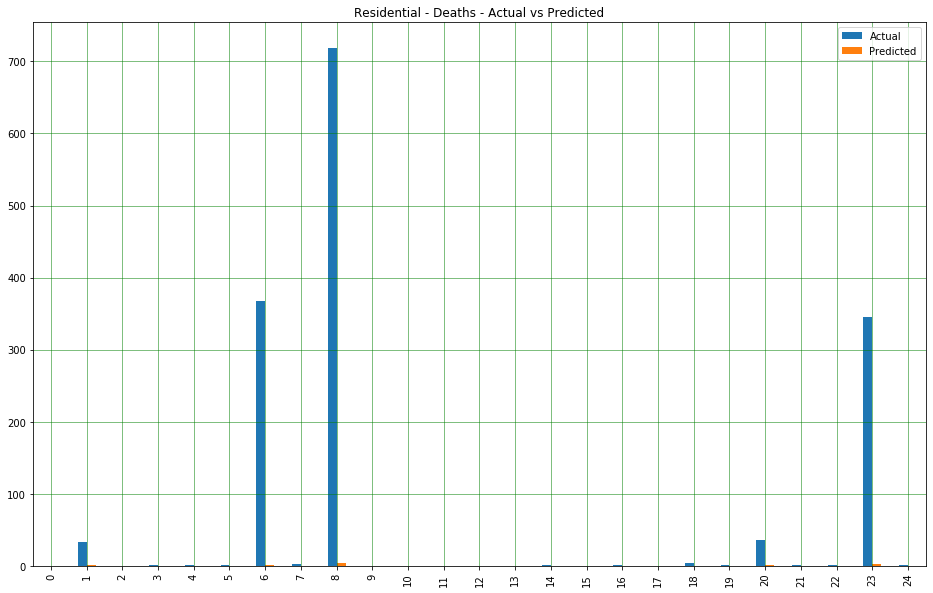

In [47]:
## Residential vs Cases
svm_regressor_r.fit(X_residential_train, y_deaths_train.ravel())
residential_deaths_pred = svm_regressor_r.predict(X_residential_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': residential_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

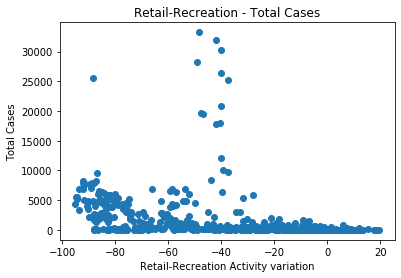

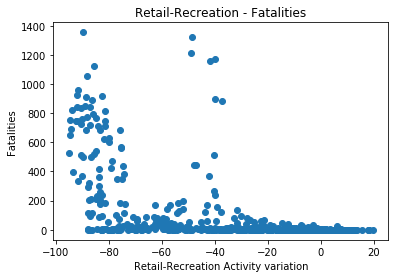

In [90]:
################# Retail-Recreation Analysis #####################

# show data regarding parks vs Cases
plt.plot(retail,new_cases,'o')
plt.title('Retail-Recreation - New Cases')  
plt.xlabel('Retail-Recreation Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(retail,new_deaths,'o')
plt.title('Retail-Recreation - New Fatalities')  
plt.xlabel('Retail-Recreation Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

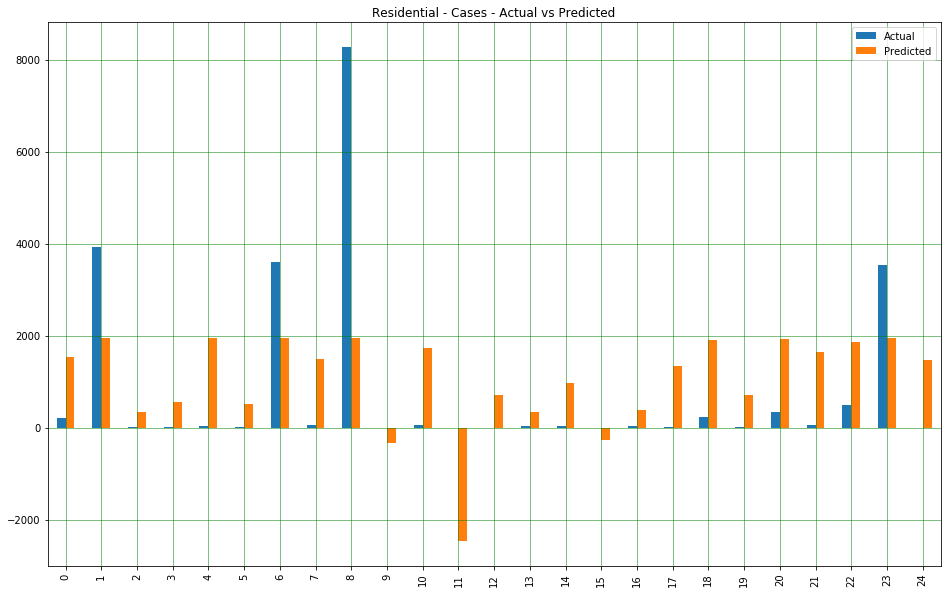

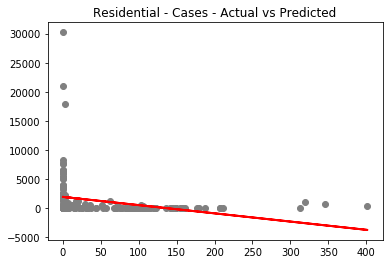

In [49]:
### Linear Regression


linear_regressor_rr = LinearRegression()  

## Retail-Recreation vs Cases
linear_regressor_rr.fit(X_retail_train, y_cases_train) #training the algorithm
retail_cases_pred = linear_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': retail_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Cases - Actual vs Predicted')  
plt.scatter(X_retail_test, y_cases_test,  color='gray')
plt.plot(X_retail_test, retail_cases_pred, color='red', linewidth=2)
plt.show()

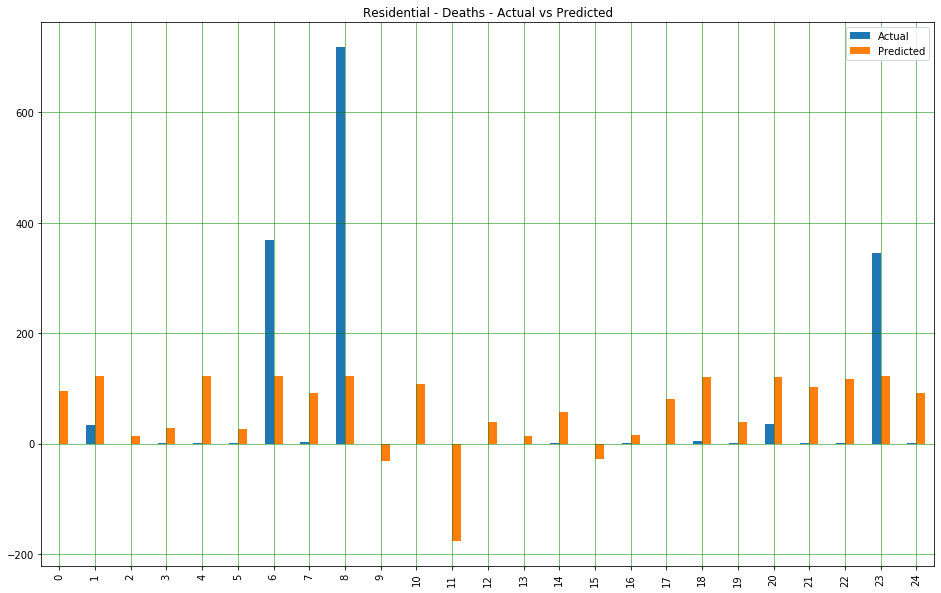

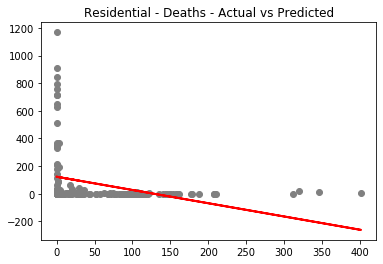

In [50]:
## Retail-Recreation vs Deaths
linear_regressor_rr.fit(X_retail_train, y_deaths_train) #training the algorithm
retail_deaths_pred = linear_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': retail_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Residential - Deaths - Actual vs Predicted')  
plt.scatter(X_retail_test, y_deaths_test,  color='gray')
plt.plot(X_retail_test, retail_deaths_pred, color='red', linewidth=2)
plt.show()

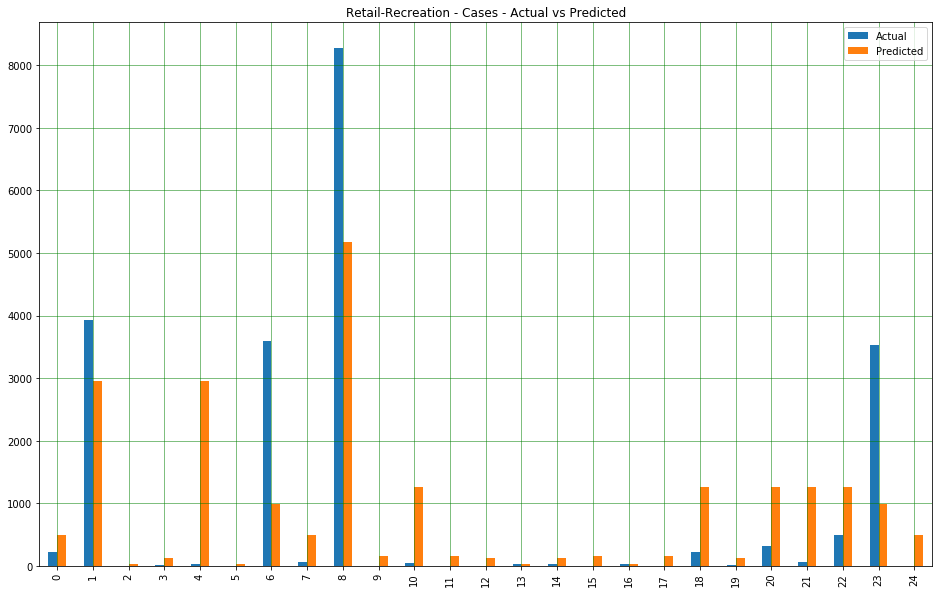

In [51]:
### Decision Tree

# Fit regression model
decision_tree_regressor_rr = DecisionTreeRegressor(max_depth=5)

## Retail-Recreation vs Cases
decision_tree_regressor_rr.fit(X_retail_train, y_cases_train)
retail_cases_pred = decision_tree_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': retail_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

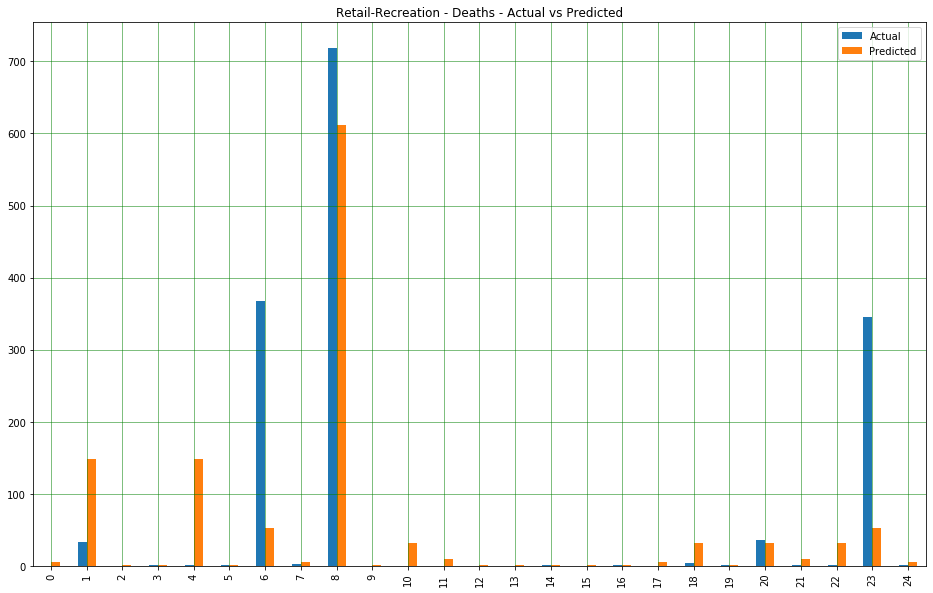

In [52]:
## Retail-Recreation vs Deaths
decision_tree_regressor_rr.fit(X_retail_train, y_deaths_train)
retail_deaths_pred = decision_tree_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': retail_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

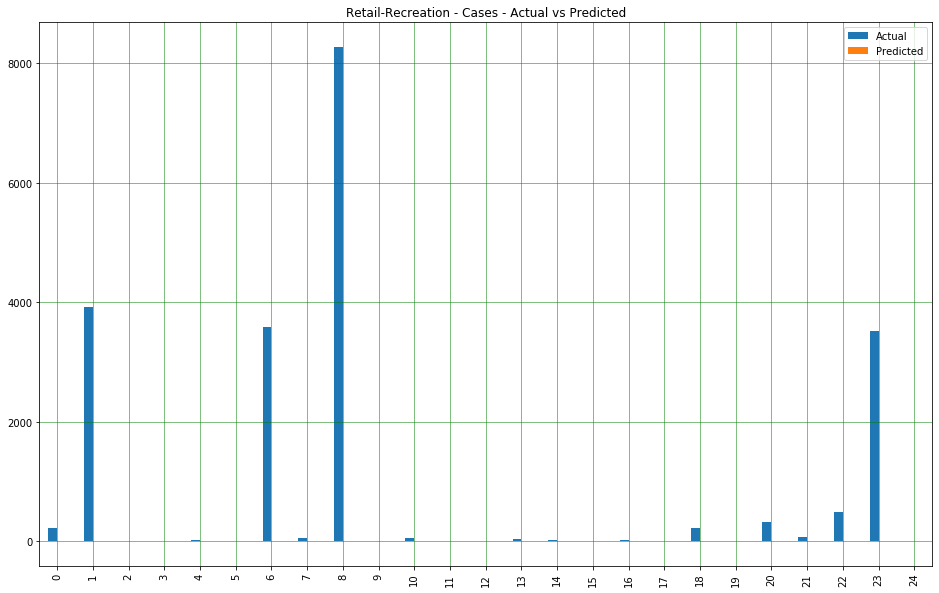

In [53]:
### Support Vector Machines
svm_regressor_rr = svm.SVR()

## Retail-Recreation vs Cases
svm_regressor_rr.fit(X_retail_train, y_cases_train.ravel())
retail_cases_pred = svm_regressor_r.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': retail_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

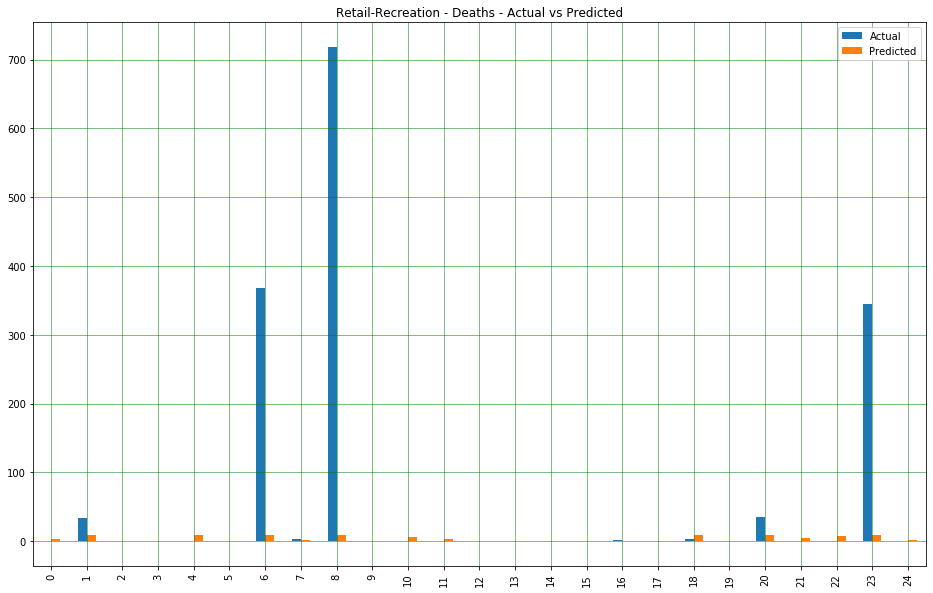

In [54]:
## Retail-Recreation vs Deaths
svm_regressor_rr.fit(X_retail_train, y_deaths_train.ravel())
retail_deaths_pred = svm_regressor_rr.predict(X_retail_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': retail_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Retail-Recreation - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

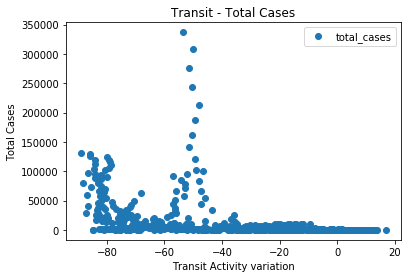

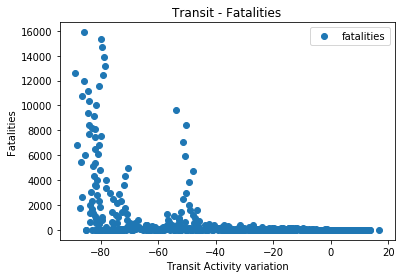

In [55]:
################# Transit Analysis #####################

# show data regarding parks vs Cases
plt.plot(transit,new_cases,'o') 
plt.title('Transit - New Cases')  
plt.xlabel('Transit Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(transit,new_deaths,'o')
plt.title('Transit - New Fatalities')  
plt.xlabel('Transit Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

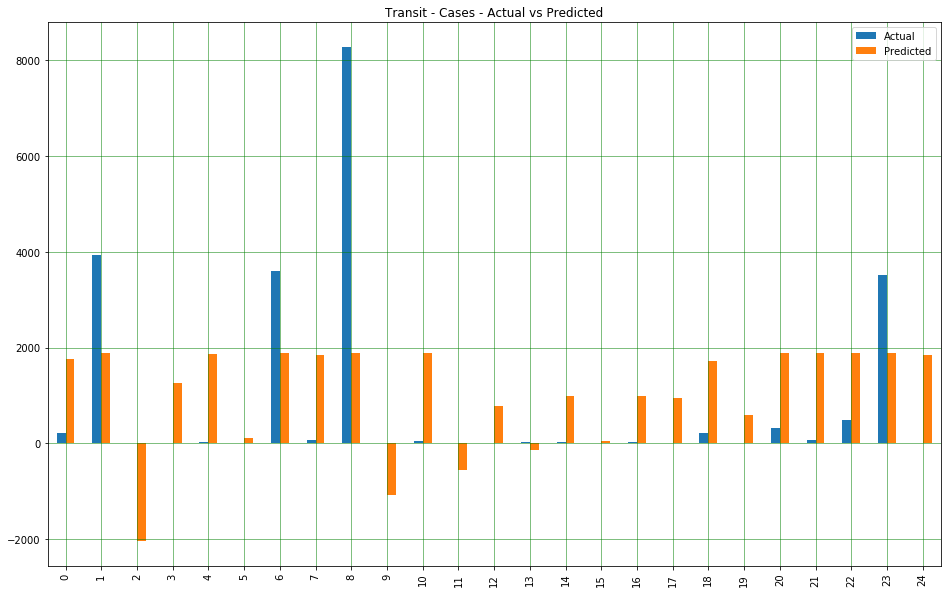

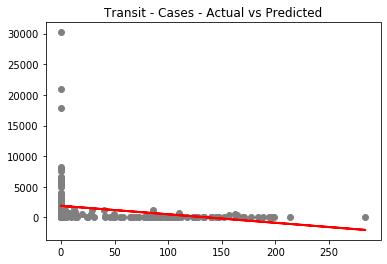

In [56]:
### Linear Regression


linear_regressor_t = LinearRegression()  

## Transit vs Cases
linear_regressor_t.fit(X_transit_train, y_cases_train) #training the algorithm
transit_cases_pred = linear_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': transit_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Transit - Cases - Actual vs Predicted')  
plt.scatter(X_transit_test, y_cases_test,  color='gray')
plt.plot(X_transit_test, transit_cases_pred, color='red', linewidth=2)
plt.show()

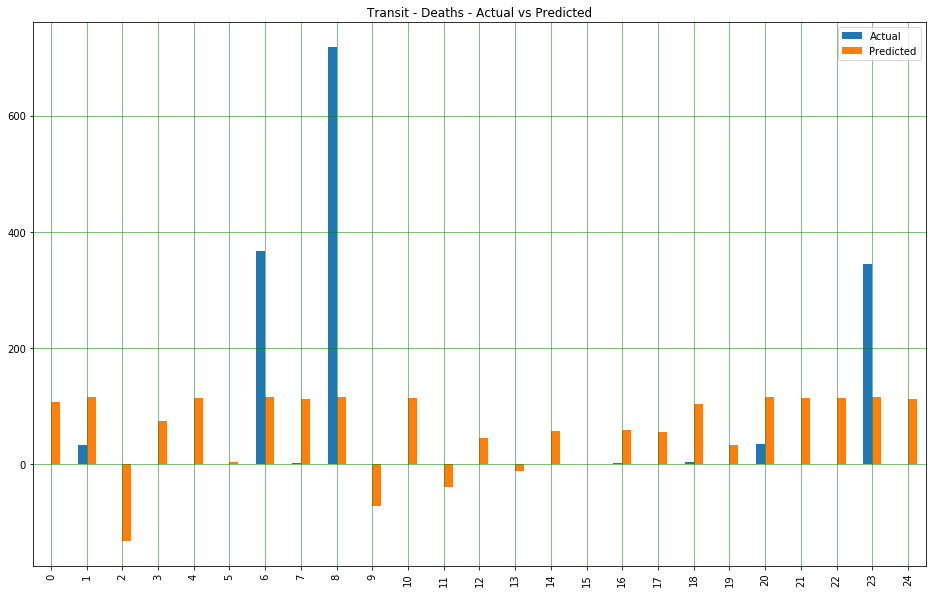

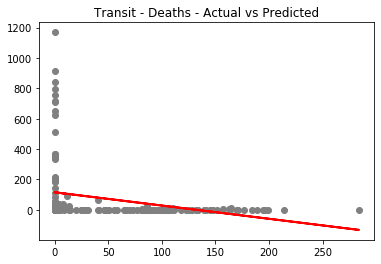

In [57]:
## Transit vs Deaths
linear_regressor_t.fit(X_transit_train, y_deaths_train) #training the algorithm
transit_deaths_pred = linear_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': transit_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.scatter(X_transit_test, y_deaths_test,  color='gray')
plt.plot(X_transit_test, transit_deaths_pred, color='red', linewidth=2)
plt.show()

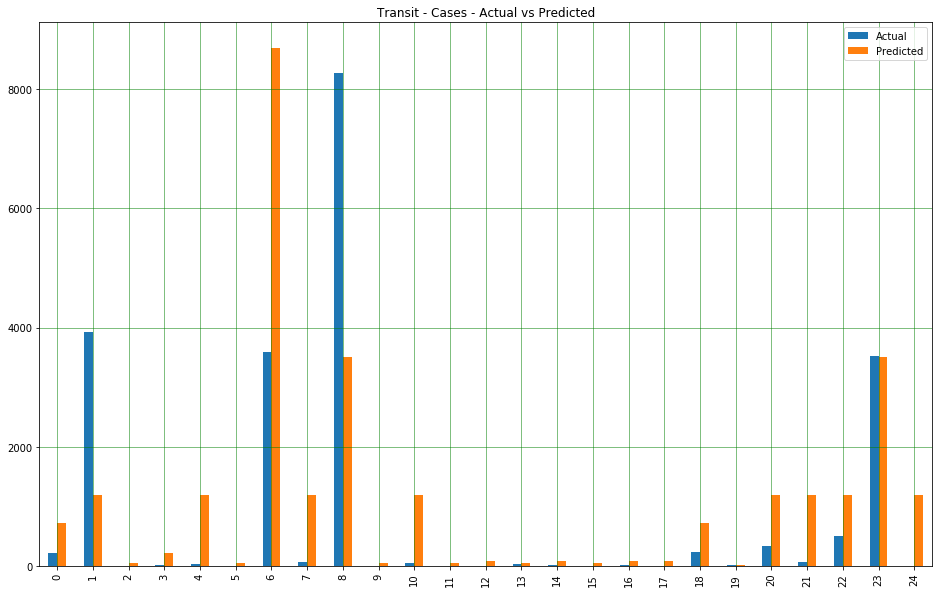

In [58]:
### Decision Tree

# Fit regression model
decision_tree_regressor_t = DecisionTreeRegressor(max_depth=5)

## Transit vs Cases
decision_tree_regressor_t.fit(X_transit_train, y_cases_train)
transit_cases_pred = decision_tree_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': transit_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


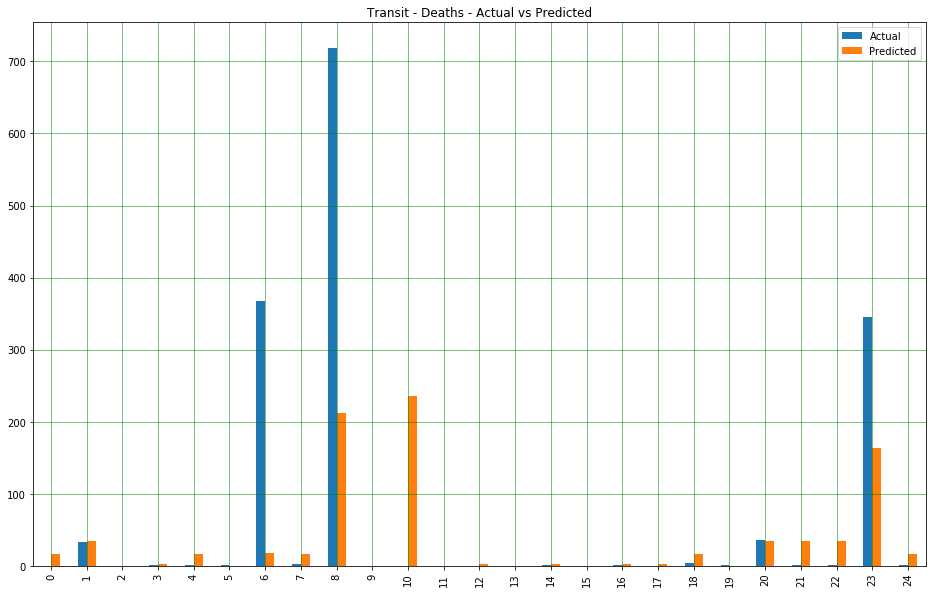

In [59]:
## Transit vs Cases
decision_tree_regressor_t.fit(X_transit_train, y_deaths_train)
transit_deaths_pred = decision_tree_regressor_t.predict(X_transit_test)


# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': transit_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


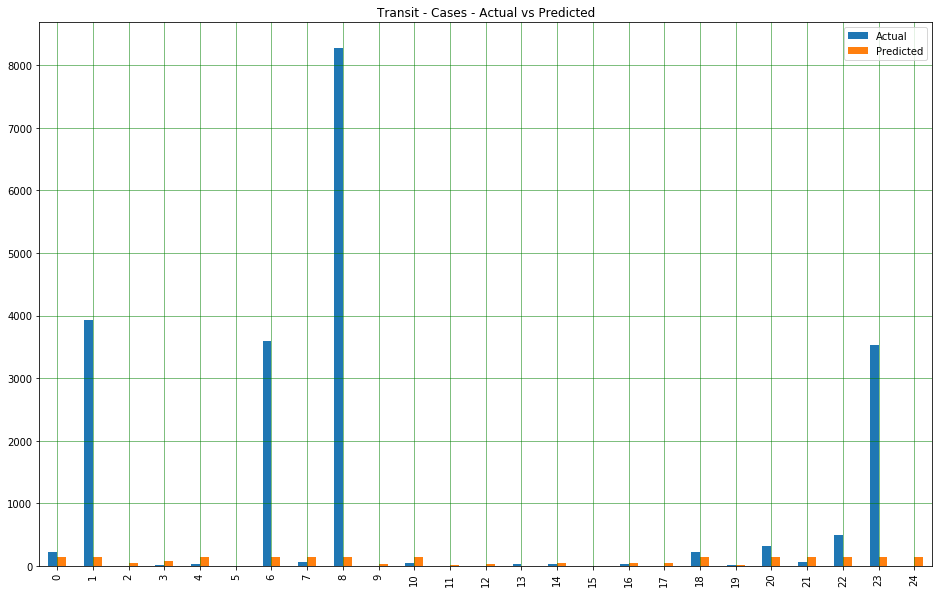

In [60]:
### Support Vector Machines
svm_regressor_t = svm.SVR()

## Transit vs Cases
svm_regressor_t.fit(X_transit_train, y_cases_train.ravel())
transit_cases_pred = svm_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': transit_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

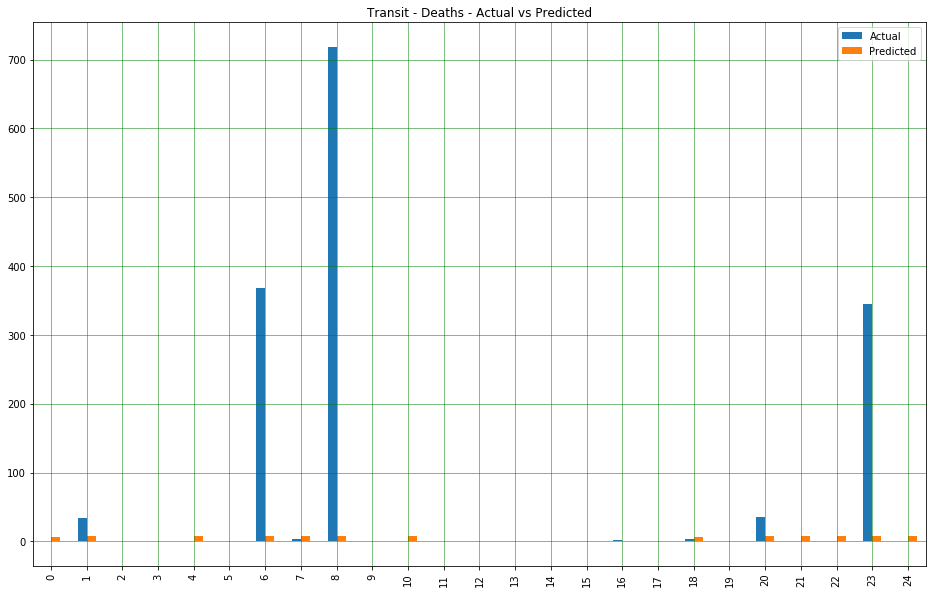

In [61]:
## Transit vs Deaths
svm_regressor_t.fit(X_transit_train, y_deaths_train.ravel())
transit_deaths_pred = svm_regressor_t.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': transit_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Deaths - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

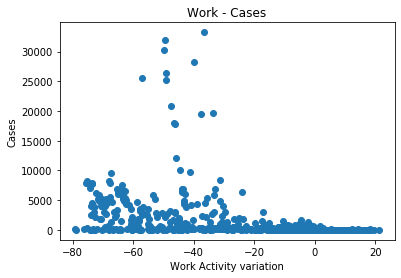

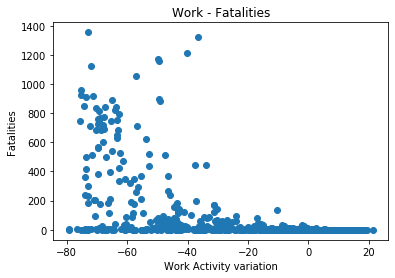

In [93]:
################# Work Analysis #####################

# show data regarding parks vs Cases
plt.plot(work,new_cases,'o')
plt.title('Work - New Cases')  
plt.xlabel('Work Activity variation')  
plt.ylabel('New Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
plt.plot(work,new_deaths,'o')
plt.title('Work - New Fatalities')  
plt.xlabel('Work Activity variation')  
plt.ylabel('New Fatalities')  
plt.show()

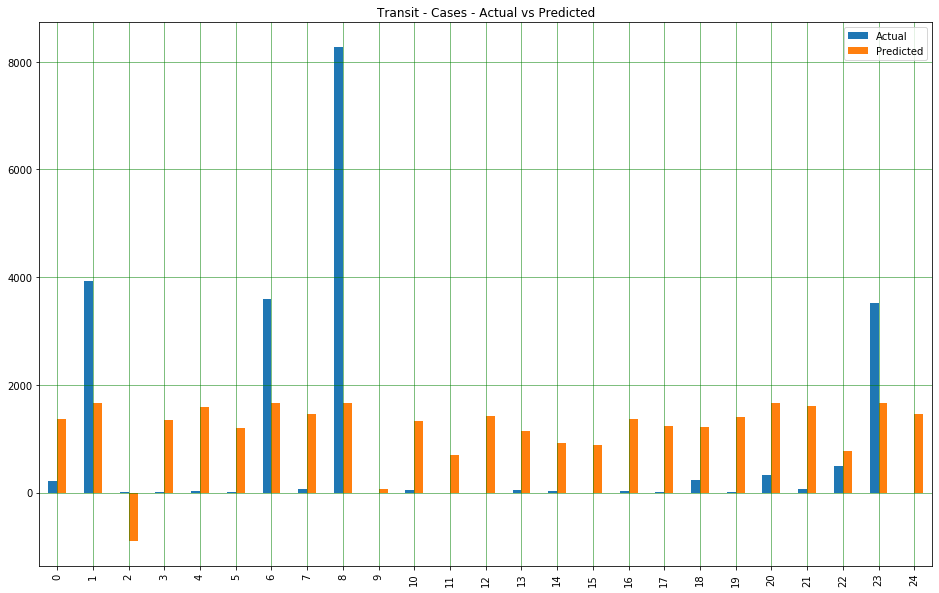

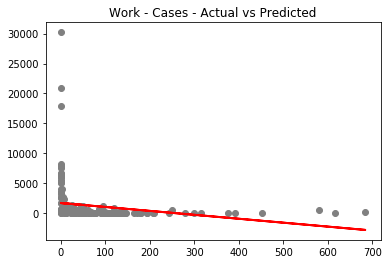

In [63]:
### Linear Regression


linear_regressor_w = LinearRegression()  

## Work vs Cases
linear_regressor_w.fit(X_work_train, y_cases_train) #training the algorithm
work_cases_pred = linear_regressor_w.predict(X_work_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': work_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Work - Cases - Actual vs Predicted')  
plt.scatter(X_work_test, y_cases_test,  color='gray')
plt.plot(X_work_test, work_cases_pred, color='red', linewidth=2)
plt.show()

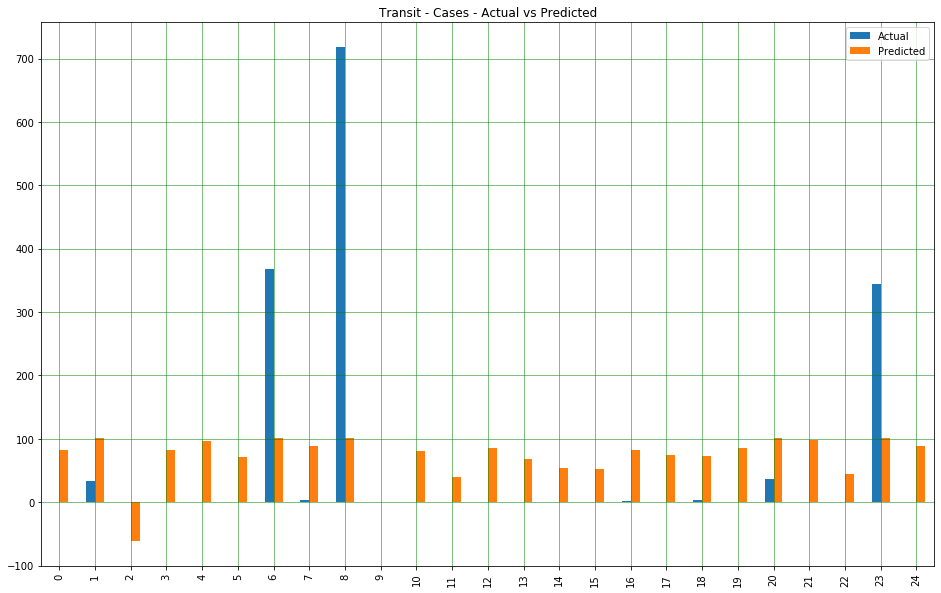

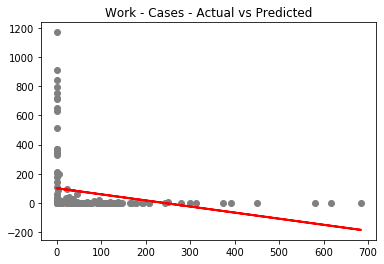

In [64]:
## Work vs Deaths
linear_regressor_w.fit(X_work_train, y_deaths_train) #training the algorithm
work_deaths_pred = linear_regressor_w.predict(X_work_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': work_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression
plt.title('Work - Cases - Actual vs Predicted')  
plt.scatter(X_work_test, y_deaths_test,  color='gray')
plt.plot(X_work_test, work_deaths_pred, color='red', linewidth=2)
plt.show()

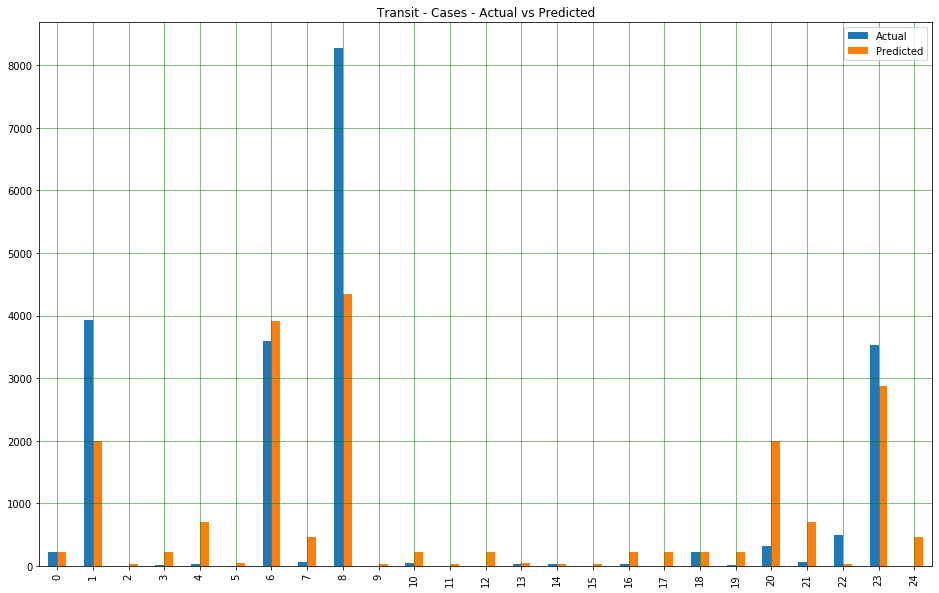

In [65]:
### Decision Tree

# Fit regression model
decision_tree_regressor_w = DecisionTreeRegressor(max_depth=5)

## Work vs Cases
decision_tree_regressor_w.fit(X_work_train, y_cases_train)
work_cases_pred = decision_tree_regressor_w.predict(X_work_test)


# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': work_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


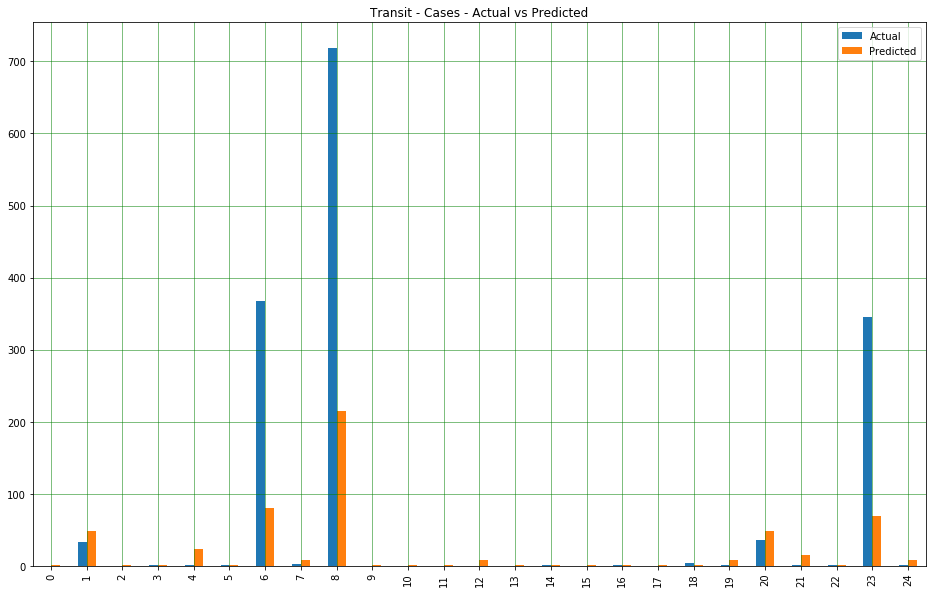

In [66]:
## Work vs Deaths
decision_tree_regressor_w.fit(X_work_train, y_deaths_train)
work_deaths_pred = decision_tree_regressor_w.predict(X_work_test)


# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': work_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

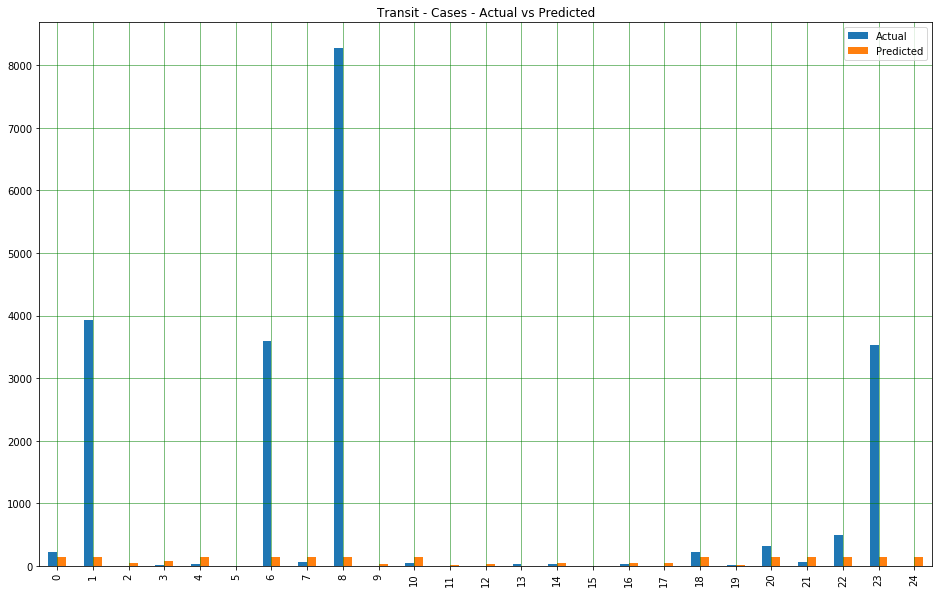

In [67]:
### Support Vector Machines
svm_regressor_w = svm.SVR()

## Transit vs Cases
svm_regressor_w.fit(X_transit_train, y_cases_train.ravel())
work_cases_pred = svm_regressor_w.predict(X_transit_test)

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': work_cases_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


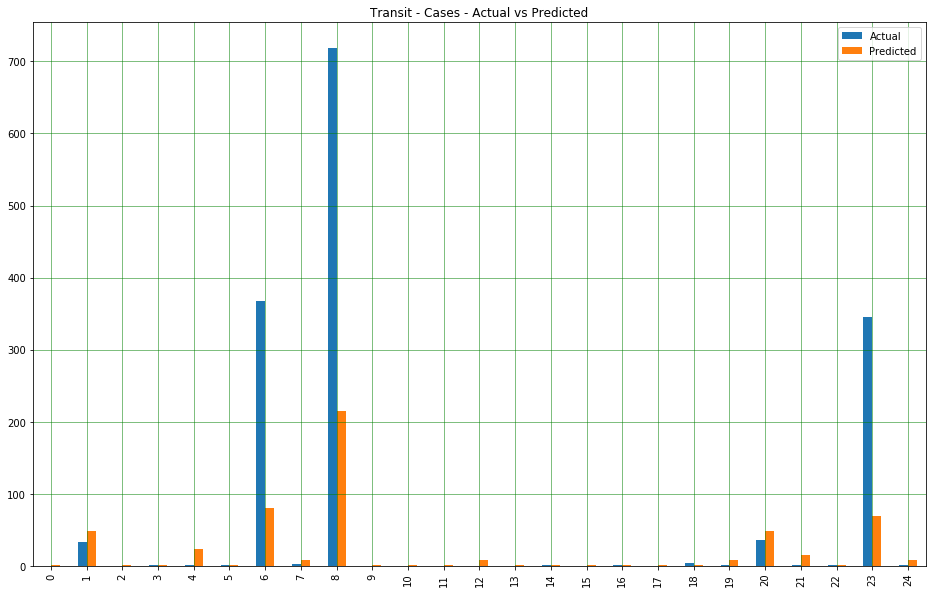

In [68]:

# Table showing actual vs predicted values
df = pd.DataFrame({'Actual': y_deaths_test.flatten(), 'Predicted': work_deaths_pred.flatten()})
df

# Graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Transit - Cases - Actual vs Predicted')  
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [69]:
################# Bibliography #####################

# Linear Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# Decision Tree
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

# Support Vector Machecins
# https://scikit-learn.org/stable/modules/svm.html#svm-regression